In [4]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

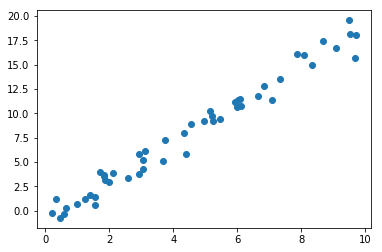

In [7]:

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [11]:
model = LinearRegression(fit_intercept=True)
model.fit(x.reshape(len(x),1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

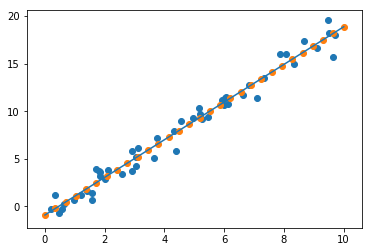

In [16]:
xfit = np.linspace(0,10,30)[:, np.newaxis]
yfit = model.predict(xfit)

plt.scatter(x,y)
plt.scatter(xfit,yfit)
plt.plot(xfit,yfit)

In [20]:
# classification
from sklearn.model_selection import train_test_split
import seaborn as sns

iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)


In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
# The model can take a categorical variable as it's target
ytrain.head()

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [21]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158